# DSA312 Project

## Part 1 of Project
Requirements:
1. Key Message(s): Your report should focus on 1 (or at most 2) key message(s) that
are crucial for the audience to understand. These could be insights related to risk
factors, demographic trends, symptom prevalence, or other important findings
from the dataset.
2. Visualizations: Use clear and impactful visualizations to convey your key
message(s). These visualizations should be easily understandable to a general
audience and should highlight the most important trends or correlations in the
data.
3. Narrative: Accompany the visualizations with a concise narrative that explains
the significance of the findings. The narrative should be persuasive and aim to
engage the public, encouraging them to consider the implications of the data.

Note: I don't quite understand what we should be presenting on this part. Will it be a key message like "Symptoms X, Y, Z are most prevalent in causing lung cancer" and therefore we work towards proving that? Is there modelling that needs to be done or it is simply EDA?


In [192]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [195]:
# Load packages in and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/junhaoteo/Documents/Y4S1/Data Science with Python/DSA312/Data/lung cancer survey.csv")
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0.0,61.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1.0,59.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,54.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
4,0.0,54.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning
* Remove NA values
    * Reason: The dataset pertains to each individual and their health characteristics are different person to person. Hence the dataset is non-sequential and therefore depends on health patterns to ascertain whether NA values should be filled with either 0 or 1. By filling NA values, it may introduce bias and lead to an inaccurate insights.

In [197]:
df_no_NA = df.dropna()

* Manipulating Age Column
    * Step 1: Deduce the range of data using the use of histogram and table.

<Figure size 1000x600 with 0 Axes>

(array([1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.530e+03, 9.740e+02,
        1.380e+03, 1.373e+03, 1.116e+03, 1.625e+03]),
 array([21., 27., 33., 39., 45., 51., 57., 63., 69., 75., 81.]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Histogram of Patient Ages')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Age Distribution')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Frequency')

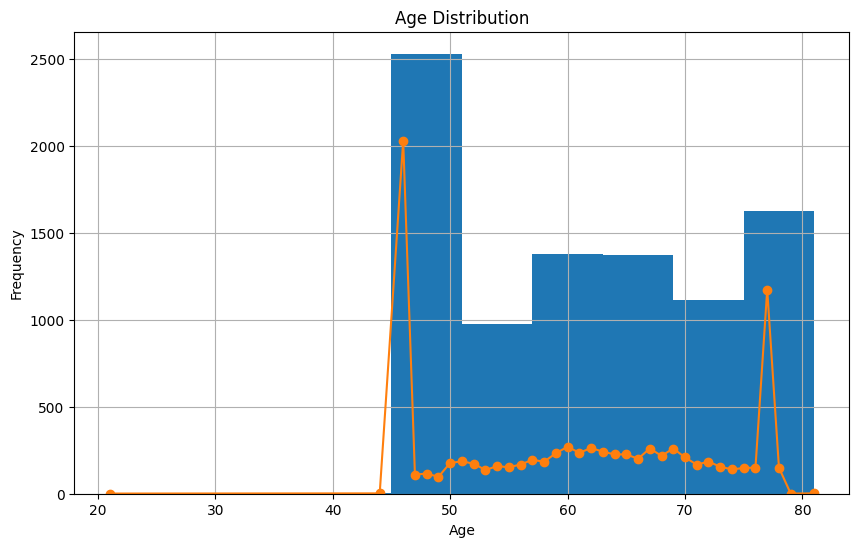

In [199]:
# Plot Histogram
plt.figure(figsize=(10, 6))
plt.hist(df_no_NA['AGE'])
plt.title('Histogram of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

# Count the frequency of each age
age_counts = df_no_NA['AGE'].value_counts().sort_index()

# Plot a line graph of the age counts
plt.plot(age_counts.index, age_counts.values, marker='o')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



In [201]:
# AGE Distribution Table
df_no_NA.groupby("AGE")["AGE"].count()

AGE
21.0       1
44.0       2
46.0    2030
47.0     110
48.0     116
49.0      97
50.0     177
51.0     186
52.0     173
53.0     136
54.0     159
55.0     152
56.0     168
57.0     195
58.0     184
59.0     233
60.0     270
61.0     235
62.0     263
63.0     242
64.0     226
65.0     226
66.0     201
67.0     260
68.0     218
69.0     260
70.0     209
71.0     167
72.0     185
73.0     155
74.0     140
75.0     148
76.0     150
77.0    1174
78.0     150
79.0       1
81.0       2
Name: AGE, dtype: int64

*Conclusion from above*
1. We see consistent and moderate number of observations from age 47 to age 76
2. We see outliers in the tail ends of the dataset, mainly, ages 21, 44, 79 and 81. It is important to note that ages 44, 79 and 81 is not too far off from the ages (middle age & senior) and may exhibit similar health patterns. As for age 21, there is a large gap and this observation may give a different
3. Lastly, large observations centres at ages 46 and 77 which may skew results if we consider all ages. Less variance may be observed if we create age groups that exhibit similar health patterns.

* Outlier Analysis
    * I am not too familiar with this form of analysis and how to determine. As we are dealing with age, the boxplot does not take into consideration of health patterns. Intuitively, we can just omit the 21 year old observation, stating that it is of the very far from the mean age of this dataset.

<Axes: xlabel='AGE'>

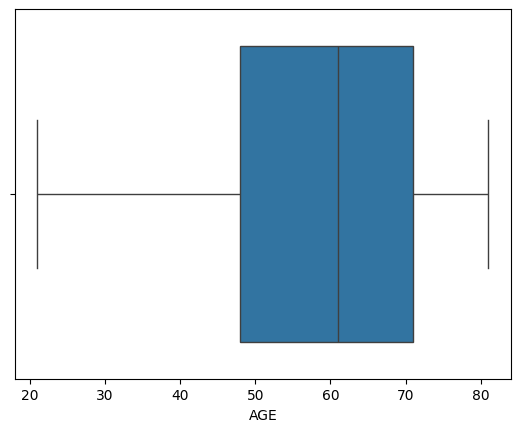

In [203]:
# Method 1: Boxplot
sns.boxplot(x=df_no_NA['AGE'])
plt.show()
                             

Text(0.5, 1.0, 'AGE vs. LUNG_CANCER')

Text(0.5, 0, 'AGE')

Text(0, 0.5, 'LUNG_CANCER')

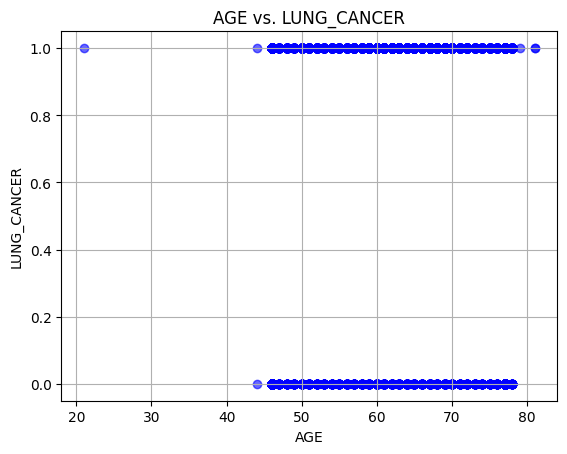

In [205]:
# Just to see the deviations better with a scatter plot
plt.scatter(df['AGE'], df["LUNG_CANCER"], color='blue', alpha=0.6)
plt.title("AGE vs. LUNG_CANCER")
plt.xlabel('AGE')
plt.ylabel("LUNG_CANCER")
plt.grid(True)
plt.show()



In [207]:
# I am assuming the 21 yr old is an extreme outlier, and therefore we take observations from ages 44 to 81 as our main sample.
# This means our analysis is targeted at the middle age to senior age groups.

df_cleaned = df_no_NA[df_no_NA["AGE"] > 21]
df_cleaned

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0.0,61.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1.0,59.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,54.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
4,0.0,54.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,1.0,62.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
8997,0.0,71.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
8998,1.0,63.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8999,1.0,70.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


Now that NA values are removed and the outlier has been removed, we have the final cleaned dataset.
As all other variables are binary, it might be good to cluster the age and make binary variables out of them. Might need to check with prof on how far can we manipulate the dataset given to us.
* Method 1: Manually taking age intervals, meaning 44 to 54, 55 to 65, 66 to 81 (Or any other intervals)
    * One possible methodology is: To ensure equal spread of observation between each age group (Enough observations to analyse patterns)
* Method 2: K prototype clustering. ([link](https://medium.com/@reddyyashu20/k-means-kmodes-and-k-prototype-76537d84a669))
    * This is a methodology that handles numerical and binary features in a dataset. The codes are following the link above

In [ ]:
# Method 1: Define binary columns for age intervals 
# df_cleaned['age_44_to_56'] = (df_cleaned['Age'] < 57).astype(int)
# df_cleaned['age_57_to_69'] = ((df_cleaned['Age'] >= 57) & (df['Age'] < 70)).astype(int)
# df['age_70_and_above'] = (df['Age'] >= 70).astype(int)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 1471380.5312955328
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 1471380.5312955328
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 1471380.5312955328
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 1471380.5312955328
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 1471380.5312955328
Best run was number 1


array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 987, ncost: 584744.1147567066
Run: 1, iteration: 2/100, moves: 324, ncost: 580057.7545144719
Run: 1, iteration: 3/100, moves: 0, ncost: 580057.7545144719
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1336, ncost: 591338.1873225952
Run: 2, iteration: 2/100, moves: 483, ncost: 580942.3002688013
Run: 2, iteration: 3/100, moves: 232, ncost: 578360.9845031281
Run: 2, iteration: 4/100, moves: 38, ncost: 578297.0209240393
Run: 2, iteration: 5/100, moves: 0, ncost: 578297.0209240393
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 1031, ncost: 586236.9094656529
Run: 3, iteration: 2/100, moves: 372, ncost: 580057.7545144719
Run: 3, iteration: 3/100, moves: 0, ncost: 580057.7545144

array([0, 0, 1, ..., 0, 0, 0], dtype=uint16)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 440, ncost: 409332.22635349364
Run: 1, iteration: 2/100, moves: 245, ncost: 408006.63331706077
Run: 1, iteration: 3/100, moves: 82, ncost: 407842.912306782
Run: 1, iteration: 4/100, moves: 0, ncost: 407842.912306782
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 956, ncost: 409125.16765467636
Run: 2, iteration: 2/100, moves: 206, ncost: 407963.17403241555
Run: 2, iteration: 3/100, moves: 69, ncost: 407842.912306782
Run: 2, iteration: 4/100, moves: 0, ncost: 407842.912306782
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 1856, ncost: 426064.8086643496
Run: 3, iteration: 2/100, moves: 807, ncost: 411888.66331225133
Run: 3, iteration: 3/100, moves: 411, ncost: 408433.635769

array([1, 0, 1, ..., 1, 0, 1], dtype=uint16)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1485, ncost: 364110.82085787016
Run: 1, iteration: 2/100, moves: 482, ncost: 361492.6456537083
Run: 1, iteration: 3/100, moves: 104, ncost: 360833.1759006455
Run: 1, iteration: 4/100, moves: 130, ncost: 360717.1166699723
Run: 1, iteration: 5/100, moves: 7, ncost: 360715.8411186849
Run: 1, iteration: 6/100, moves: 0, ncost: 360715.8411186849
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1491, ncost: 374057.09831499524
Run: 2, iteration: 2/100, moves: 659, ncost: 366760.63954956044
Run: 2, iteration: 3/100, moves: 363, ncost: 364683.52168811567
Run: 2, iteration: 4/100, moves: 290, ncost: 363570.3151295576
Run: 2, iteration: 5/100, moves: 196, ncost: 362836.9793957065
Run: 2, iteration: 6/100, moves: 233, ncost: 362164.0799739313
Run: 2

array([2, 2, 3, ..., 2, 2, 3], dtype=uint16)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 980, ncost: 348500.0185397055
Run: 1, iteration: 2/100, moves: 429, ncost: 346754.48100825417
Run: 1, iteration: 3/100, moves: 169, ncost: 346393.79118061275
Run: 1, iteration: 4/100, moves: 109, ncost: 346182.23412863933
Run: 1, iteration: 5/100, moves: 61, ncost: 346135.47102622164
Run: 1, iteration: 6/100, moves: 3, ncost: 346135.00754215085
Run: 1, iteration: 7/100, moves: 0, ncost: 346135.00754215085
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 2396, ncost: 356230.9066402091
Run: 2, iteration: 2/100, moves: 723, ncost: 352092.29777405574
Run: 2, iteration: 3/100, moves: 209, ncost: 351849.2008630256
Run: 2, iteration: 4/100, moves: 13, ncost: 351845.9805027664
Run: 2, iteration: 5/100, moves: 0, ncost: 351845.9805027664
Init: in

array([2, 0, 2, ..., 2, 0, 2], dtype=uint16)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1525, ncost: 333173.3660189464
Run: 1, iteration: 2/100, moves: 660, ncost: 331575.4379646466
Run: 1, iteration: 3/100, moves: 309, ncost: 330351.5706694193
Run: 1, iteration: 4/100, moves: 476, ncost: 329121.83480292023
Run: 1, iteration: 5/100, moves: 128, ncost: 328981.4403927468
Run: 1, iteration: 6/100, moves: 83, ncost: 328918.66819625045
Run: 1, iteration: 7/100, moves: 64, ncost: 328848.0145394302
Run: 1, iteration: 8/100, moves: 123, ncost: 328270.4325768614
Run: 1, iteration: 9/100, moves: 57, ncost: 328241.2593633379
Run: 1, iteration: 10/100, moves: 0, ncost: 328241.2593633379
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1918, ncost: 348470.35822653864
Run: 2, iteration: 2/100, moves: 1567, ncost: 334329.9008720943
Run: 2

array([4, 1, 4, ..., 4, 2, 4], dtype=uint16)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1671, ncost: 323800.4799370957
Run: 1, iteration: 2/100, moves: 524, ncost: 323158.1919692515
Run: 1, iteration: 3/100, moves: 412, ncost: 321867.89297079487
Run: 1, iteration: 4/100, moves: 141, ncost: 321755.0606077024
Run: 1, iteration: 5/100, moves: 2, ncost: 321754.90867454535
Run: 1, iteration: 6/100, moves: 0, ncost: 321754.90867454535
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1687, ncost: 318115.9443834186
Run: 2, iteration: 2/100, moves: 578, ncost: 316372.3325662129
Run: 2, iteration: 3/100, moves: 340, ncost: 315219.98834345123
Run: 2, iteration: 4/100, moves: 109, ncost: 315161.800894885
Run: 2, iteration: 5/100, moves: 1, ncost: 315161.772052005
Run: 2, iteration: 6/100, moves: 0, ncost: 315161.772052005
Init: initial

array([0, 5, 0, ..., 2, 5, 2], dtype=uint16)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2662, ncost: 316045.06028554856
Run: 1, iteration: 2/100, moves: 562, ncost: 314805.1057706896
Run: 1, iteration: 3/100, moves: 489, ncost: 311681.6639965269
Run: 1, iteration: 4/100, moves: 596, ncost: 309379.7577602024
Run: 1, iteration: 5/100, moves: 419, ncost: 308873.6260145288
Run: 1, iteration: 6/100, moves: 18, ncost: 308868.0395748445
Run: 1, iteration: 7/100, moves: 0, ncost: 308868.0395748445
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1958, ncost: 312909.13206548325
Run: 2, iteration: 2/100, moves: 225, ncost: 312838.1030141804
Run: 2, iteration: 3/100, moves: 0, ncost: 312838.1030141804
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 2464, ncost: 318215.46

array([1, 4, 6, ..., 6, 4, 6], dtype=uint16)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1505, ncost: 314680.8879796682
Run: 1, iteration: 2/100, moves: 807, ncost: 312912.1608266329
Run: 1, iteration: 3/100, moves: 337, ncost: 312054.4861342306
Run: 1, iteration: 4/100, moves: 126, ncost: 311900.5096556495
Run: 1, iteration: 5/100, moves: 78, ncost: 311807.9909390644
Run: 1, iteration: 6/100, moves: 93, ncost: 311713.63447056856
Run: 1, iteration: 7/100, moves: 25, ncost: 311704.90837566485
Run: 1, iteration: 8/100, moves: 4, ncost: 311704.09040119086
Run: 1, iteration: 9/100, moves: 0, ncost: 311704.09040119086
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 2375, ncost: 302875.7472594693
Run: 2, iteration: 2/100, moves: 764, ncost: 301367.8148499058
Run: 2, iteration: 3/100, moves: 201, ncost: 301001.7161644721
Run: 2, i

array([6, 0, 2, ..., 6, 0, 6], dtype=uint16)

Text(0.5, 1.0, 'Elbow Method for Optimal Clusters')

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Cost')

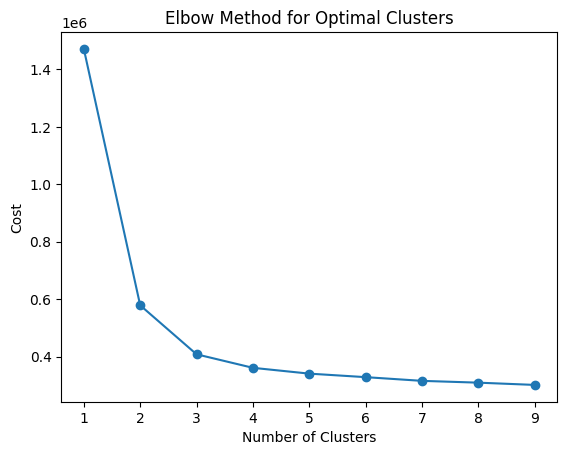

In [117]:
# Method 2: # This code chunk takes awhile
from kmodes.kprototypes import KPrototypes

# Define the indices of the numerical and categorical features
cat_cols = [0,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
num_cols = [1]

# Calculate cost for different cluster numbers
costs = []
for num_clusters in range(1, 10): # From 1 to 9
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao', n_init=5, verbose=2)
    kproto.fit_predict(df_cleaned, categorical= cat_cols)
    costs.append(kproto.cost_)

# Plot the elbow curve, selection of optimal number of cluster via graphical approach
plt.plot(range(1, 10), costs, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.show()


From the graph above, steepest drop is at cluster 2 and the graph starts to flatten out after cluster 3. We can consider these two clusters in our analysis. Intuitively, I would think of these age groups to be middle age and seniors and it make logical sense to consider 2 instead of 3. As such, I have gone with cluster 2 for this example. However, health patterns may be exhibited better at cluster 3. This can be taken into consideration in Part 2 of the project when we are creating our model.

In [124]:
# Fit K-Prototypes model
kproto = KPrototypes(n_clusters=2, init='Cao', verbose=2, random_state=42)
clusters = kproto.fit_predict(df_cleaned, categorical=cat_cols)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 837, ncost: 586261.3943873475
Run: 1, iteration: 2/100, moves: 369, ncost: 580148.0291794365
Run: 1, iteration: 3/100, moves: 205, ncost: 578297.0209240393
Run: 1, iteration: 4/100, moves: 0, ncost: 578297.0209240393
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 757, ncost: 583992.8070376596
Run: 2, iteration: 2/100, moves: 312, ncost: 579870.6612169943
Run: 2, iteration: 3/100, moves: 189, ncost: 578297.0209240393
Run: 2, iteration: 4/100, moves: 0, ncost: 578297.0209240393
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 515, ncost: 578297.0650739784
Run: 3, iteration: 2/100, moves: 1, ncost: 578297.0209240393
Run: 3, iteration: 3/100, moves: 0, ncost: 578297.0209240393

ValueError: Length of values (9000) does not match length of index (9100)

In [210]:
# Assign cluster labels to the DataFrame
df_cleaned['cluster'] = clusters

# See how clusters are grouped
age_cluster_summary = df_cleaned.groupby('cluster')['AGE'].agg(['min', 'max'])
print(age_cluster_summary) # We see here, we have grouped cluster = 0 as age 61 to 81, and cluster = 1 as age 44 to 60.

df_cleaned['cluster'].value_counts() # Each clusters are approximately similarly in number of observation.

          min   max
cluster            
0        61.0  81.0
1        44.0  60.0


/var/folders/fc/f1h6qsms6kn106201z7qmqdc0000gn/T/ipykernel_77423/3236544762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cluster'] = clusters


cluster
0    4612
1    4388
Name: count, dtype: int64

#### Calculating correlation using Phi ([link](https://www.people.vcu.edu/~pdattalo/702SuppRead/MeasAssoc/NominalAssoc.html#:~:text=Computationally%2C%20phi%20is%20the%20square,chi%2Dsquare%20is%20not%20used.))

* Useful method for calculating correlation between binary variables


                         GENDER   SMOKING YELLOW_FINGERS   ANXIETY  \
GENDER                      NaN  0.011091       0.031982  0.039688   
SMOKING                0.011091       NaN       0.001875  0.013509   
YELLOW_FINGERS         0.031982  0.001875            NaN  0.062337   
ANXIETY                0.039688  0.013509       0.062337       NaN   
PEER_PRESSURE          0.074431  0.026481       0.055349  0.040471   
CHRONIC DISEASE        0.004365  0.029657       0.008992  0.032866   
FATIGUE                0.049215  0.001695       0.001341  0.017928   
ALLERGY                0.053157  0.024306       0.028243  0.047311   
WHEEZING               0.036826  0.032343        0.04345  0.039382   
ALCOHOL CONSUMING      0.040493  0.019939       0.075707  0.001826   
COUGHING               0.027357  0.007131       0.014883  0.058642   
SHORTNESS OF BREATH    0.017837  0.003838       0.016048  0.005192   
SWALLOWING DIFFICULTY   0.00926  0.004096       0.065091  0.078098   
CHEST PAIN          

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Phi Coefficient Heatmap')

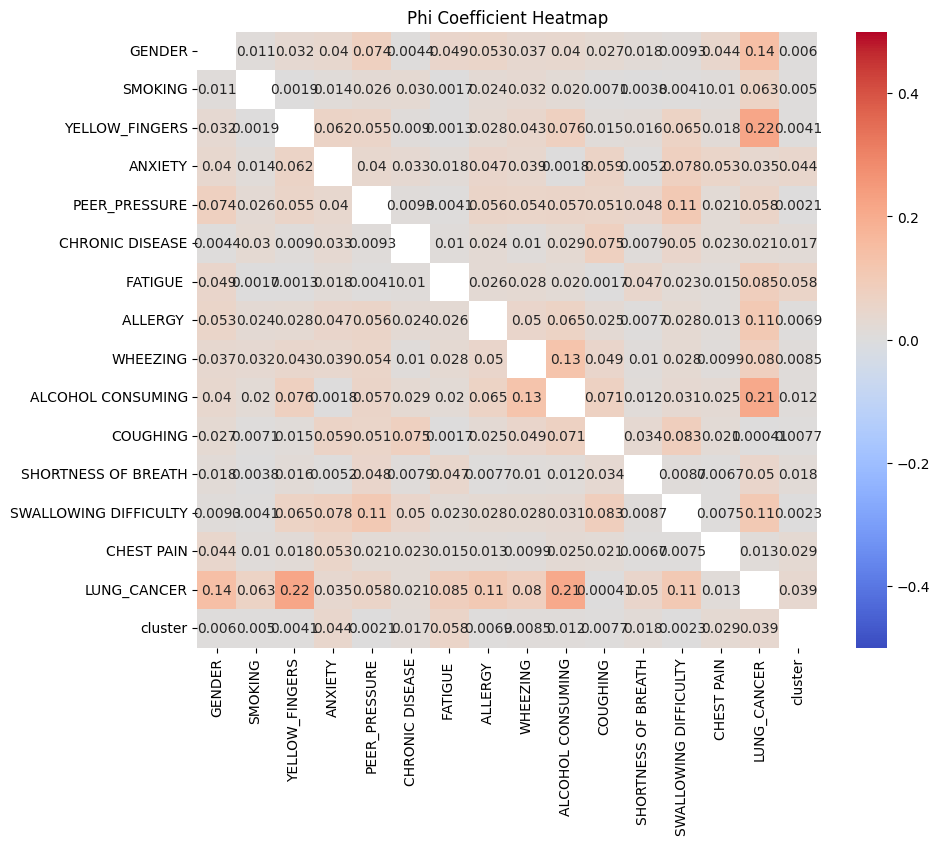

    Feature1               Feature2       Association  Phi Coefficient
0     GENDER                SMOKING  Weak association         0.011091
1     GENDER         YELLOW_FINGERS  Weak association         0.031982
2     GENDER                ANXIETY  Weak association         0.039688
3     GENDER          PEER_PRESSURE  Weak association         0.074431
4     GENDER        CHRONIC DISEASE  Weak association         0.004365
..       ...                    ...               ...              ...
235  cluster               COUGHING  Weak association         0.007702
236  cluster    SHORTNESS OF BREATH  Weak association         0.018313
237  cluster  SWALLOWING DIFFICULTY  Weak association         0.002322
238  cluster             CHEST PAIN  Weak association         0.028594
239  cluster            LUNG_CANCER  Weak association         0.038904

[240 rows x 4 columns]
                  Feature1               Feature2           Association  \
13                  GENDER            LUNG_CANCER

In [224]:
from scipy.stats import chi2_contingency
import numpy as np

# df_cleaned['cluster'] = df_cleaned['cluster'].astype(float)
# df_cleaned = df_cleaned.drop(columns=['AGE'])

def phi_coefficient(x, y):
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    
    # Perform Chi-Square test
    chi2, _, _, _ = chi2_contingency(contingency_table, correction=False)
    
    # Total number of observations
    n = contingency_table.sum().sum()
    
    # Compute Phi Coefficient
    phi = (chi2 / n) ** 0.5
    return phi

# Creating a correlation matrix
corr_matrix = pd.DataFrame(index=final_df.columns, columns=df_cleaned.columns)
results = []
for col1 in df_cleaned.columns:
    for col2 in df_cleaned.columns:
        if col1 != col2:
            corr_matrix.loc[col1, col2] = phi_coefficient(df_cleaned[col1], df_cleaned[col2])
        else:
            corr_matrix.loc[col1, col2] = np.nan  # Diagonal elements are not needed
        

print(corr_matrix)


# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap='coolwarm', center=0, vmin=-0.5, vmax=0.5)
plt.title('Phi Coefficient Heatmap')
plt.show()

# Obtaining features with strong associations
results = []

def categorize_association(phi):
    if abs(phi) < 0.1:
        return 'Weak association'
    elif abs(phi) < 0.3:
        return 'Moderate association'
    else:
        return 'Strong association'

# Iterate over the correlation matrix
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2:
            phi = corr_matrix.loc[col1, col2]
            association = categorize_association(phi)
            
            # Append the results
            results.append({
                'Feature1': col1,
                'Feature2': col2,
                'Association': association,
                'Phi Coefficient': phi
            })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

print(results_df[results_df["Association"]== "Moderate association"])


Moderate association:
* GENDER & LUNG CANCER (Important Feature)
* YELLOW FINGERS & LUNG CANCER (Important Feature)
* PEER PRESSURE & SWALLOWING DIFFICULTY
* ALLERGY & LUNG ALLERGY (Important Feature)
* WHEEZING * ALCOHOL CONSUMPTION

Generally good as variables are not highly correlated with one another. Fulfills the multi-collinearity conditions.

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
cluster,,,,,,,,,,,,,,,
0.0,2460.0,2414.0,2426.0,2203.0,2360.0,2110.0,3293.0,2513.0,2281.0,2396.0,2722.0,3257.0,1600.0,2958.0,3782.0
1.0,2367.0,2275.0,2326.0,1904.0,2236.0,2081.0,2896.0,2421.0,2133.0,2331.0,2623.0,3025.0,1532.0,2693.0,3463.0


<Axes: >

Text(0, 0.5, 'Total count')

Text(0.5, 0, 'Variables')

Text(0.5, 1.0, 'Positive conditions by Cluster')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'GENDER'),
  Text(1, 0, 'SMOKING'),
  Text(2, 0, 'YELLOW_FINGERS'),
  Text(3, 0, 'ANXIETY'),
  Text(4, 0, 'PEER_PRESSURE'),
  Text(5, 0, 'CHRONIC DISEASE'),
  Text(6, 0, 'FATIGUE '),
  Text(7, 0, 'ALLERGY '),
  Text(8, 0, 'WHEEZING'),
  Text(9, 0, 'ALCOHOL CONSUMING'),
  Text(10, 0, 'COUGHING'),
  Text(11, 0, 'SHORTNESS OF BREATH'),
  Text(12, 0, 'SWALLOWING DIFFICULTY'),
  Text(13, 0, 'CHEST PAIN'),
  Text(14, 0, 'LUNG_CANCER')])

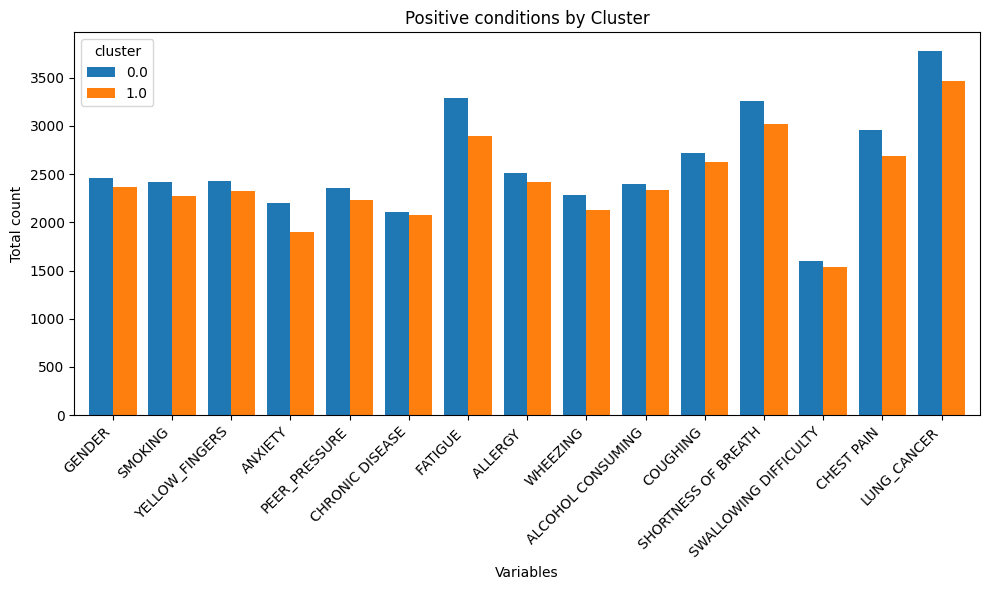

In [242]:
# Identifying health patterns by cluster
grouped_sum = df_cleaned.groupby('cluster').sum()
grouped_sum

grouped_sum.T.plot(kind='bar', figsize=(10, 6), width=0.8)

# Add labels and title
plt.ylabel('Total count')
plt.xlabel('Variables')
plt.title('Positive conditions by Cluster')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

From the graph above, we see that the number of male between the two groups are approximately the same.
The other key insight is that each health condition we see, we notice that the count for cluster 0 (Seniors) are consistently higher than the count for cluster 1 (Middle Age).

<Axes: >

Text(0, 0.5, 'Total count')

Text(0.5, 0, 'Variables')

Text(0.5, 1.0, 'No conditions by Cluster')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'GENDER'),
  Text(1, 0, 'SMOKING'),
  Text(2, 0, 'YELLOW_FINGERS'),
  Text(3, 0, 'ANXIETY'),
  Text(4, 0, 'PEER_PRESSURE'),
  Text(5, 0, 'CHRONIC DISEASE'),
  Text(6, 0, 'FATIGUE '),
  Text(7, 0, 'ALLERGY '),
  Text(8, 0, 'WHEEZING'),
  Text(9, 0, 'ALCOHOL CONSUMING'),
  Text(10, 0, 'COUGHING'),
  Text(11, 0, 'SHORTNESS OF BREATH'),
  Text(12, 0, 'SWALLOWING DIFFICULTY'),
  Text(13, 0, 'CHEST PAIN'),
  Text(14, 0, 'LUNG_CANCER')])

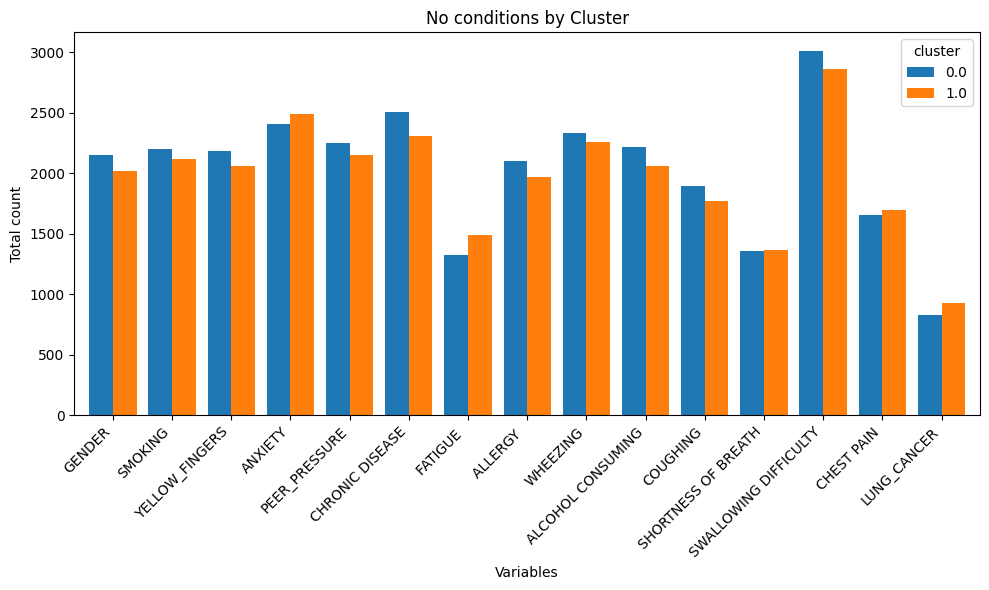

In [266]:
# Identifying health patterns by cluster
import pandas as pd
import matplotlib.pyplot as plt

grouped_sum = df_cleaned.groupby('cluster').sum()

cluster_sizes = df_cleaned.groupby('cluster').count()

grouped_with_no_condition = cluster_sizes - grouped_sum # Obtain count of binary = 0

grouped_with_no_condition.T.plot(kind='bar', figsize=(10, 6), width=0.8)

# Add labels and title
plt.ylabel('Total count')
plt.xlabel('Variables')
plt.title('No conditions by Cluster')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


The graph above isn't that intuitive on finding insights.
* Can consider grouping the data by Gender and check if there is different likelihoods of health conditions by gender.
* Can consider grouping specific conditions that have high correlation with each other and plotting likelihood of lung cancer.
    * Eg. Those with Coughing and Allergy on lung cancer.